In [1]:
import glob
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import boto3
%matplotlib inline

In [2]:
s3 = boto3.resource('s3')
my_bucket = s3.Bucket('flosie')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [ ]:
# Create Dirs for Download
os.makedirs("Masks")
os.makedirs("FZA-RAW")

In [31]:
os.makedirs("FZ-PNG")
os.makedirs("FZ-MASKS")

In [10]:
# Download Orig images
for s3_object in my_bucket.objects.filter(Prefix='openvcSR/'):
    path, filename = os.path.split(s3_object.key)
    #if s3_object.key.endswith('.png'):
        #print(s3_object.key)
        #print(filename)
    my_bucket.download_file(s3_object.key, f'openvcSR/{filename}')

# Download Masks
#for s3_object in my_bucket.objects.filter(Prefix='FZ-MASKS/'):
#    path, filename = os.path.split(s3_object.key)
    
    #print(f'FZA-RAW/{filename}')
#    if s3_object.key.endswith('.png'):
        #print(s3_object.key)
#        my_bucket.download_file(s3_object.key, f'FZ-MASKS/{filename}')

In [4]:
# Download manifest
my_bucket.download_file('hr_bw_cont.png', 'SemSegPipe/image/hr_bw_cont.png')



In [15]:
!aws s3 cp s3://flosie//SISR/openvcSR/sr.py ./opencvSR --recursive

In [ ]:
print(path)

In [3]:
# ----> Make List of corresponding images from manifest alternating orig-mask
import json
import ast

fileList = []

with open('validation.manifest') as f:
    for line in f.readlines():
        #print(line)
        #data = f.readline()
    #lines = f.readlines()
    #data = json.load(lines)
        json_oboe = json.loads(line)
        
        #print(json_oboe['source-ref'])
        #print(json_oboe['Fahrzeugausweis-ref'])
        
        fileList.append(json_oboe['source-ref'])
        fileList.append(json_oboe['Fahrzeugausweis-ref'])
        
#print(fileList)
cleanedPathList = []
for path in fileList:
    #print(path[11:])
    #print("-----------------------")
    cleanedPathList.append(path[12:])
    
print(cleanedPathList)

# ----> Make List of corresponding images from manifest alternating orig-mask

['FZ-PNG/IMG_4523.png', 'FZ-MASKS/107_2022-05-14T04:51:44.165165.png', 'FZ-PNG/IMG_4524.png', 'FZ-MASKS/108_2022-05-12T15:47:29.056523.png', 'FZ-PNG/IMG_4525.png', 'FZ-MASKS/109_2022-05-13T12:44:57.526431.png', 'FZ-PNG/IMG_4526.png', 'FZ-MASKS/110_2022-05-12T11:57:23.033399.png', 'FZ-PNG/IMG_4527.png', 'FZ-MASKS/111_2022-05-11T12:00:31.042686.png', 'FZ-PNG/IMG_4528.png', 'FZ-MASKS/112_2022-05-11T12:28:17.177480.png', 'FZ-PNG/IMG_4529.png', 'FZ-MASKS/113_2022-05-14T06:40:13.365262.png', 'FZ-PNG/IMG_4530.png', 'FZ-MASKS/114_2022-05-13T15:20:24.145608.png', 'FZ-PNG/IMG_8335.png', 'FZ-MASKS/115_2022-05-11T13:58:43.090149.png', 'FZ-PNG/IMG_8336.png', 'FZ-MASKS/116_2022-05-11T13:47:22.834178.png', 'FZ-PNG/IMG_8337.png', 'FZ-MASKS/117_2022-05-11T13:37:13.154169.png', 'FZ-PNG/IMG_8338.png', 'FZ-MASKS/118_2022-05-12T15:34:00.395458.png', 'FZ-PNG/IMG_9996.png', 'FZ-MASKS/120_2022-05-12T15:27:20.213008.png', 'FZ-PNG/IMG_9997.png', 'FZ-MASKS/121_2022-05-13T15:18:17.963292.png', 'FZ-PNG/IMG_9998.pn

In [15]:
#print(cleanedPathList[248])
# Convert images
from PIL import Image
fileNAME = "FZ-PNG/MicrosoftTeams-image_1.png"
img = Image.open(fileNAME)
print(img.format)
im1 = Image.open(fileNAME)
im1.save(fileNAME)
img = Image.open(fileNAME)
print(img.format)

PNG
PNG


In [72]:
print(len(cleanedPathList))

300


In [4]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
images = []
#images.append(mpimg.imread(cleanedPathList[250]))
for img_path in cleanedPathList:
    print(img_path)
    images.append(mpimg.imread(img_path))

FZ-PNG/IMG_4523.png
FZ-MASKS/107_2022-05-14T04:51:44.165165.png
FZ-PNG/IMG_4524.png
FZ-MASKS/108_2022-05-12T15:47:29.056523.png
FZ-PNG/IMG_4525.png
FZ-MASKS/109_2022-05-13T12:44:57.526431.png
FZ-PNG/IMG_4526.png
FZ-MASKS/110_2022-05-12T11:57:23.033399.png
FZ-PNG/IMG_4527.png
FZ-MASKS/111_2022-05-11T12:00:31.042686.png
FZ-PNG/IMG_4528.png
FZ-MASKS/112_2022-05-11T12:28:17.177480.png
FZ-PNG/IMG_4529.png
FZ-MASKS/113_2022-05-14T06:40:13.365262.png
FZ-PNG/IMG_4530.png
FZ-MASKS/114_2022-05-13T15:20:24.145608.png
FZ-PNG/IMG_8335.png
FZ-MASKS/115_2022-05-11T13:58:43.090149.png
FZ-PNG/IMG_8336.png
FZ-MASKS/116_2022-05-11T13:47:22.834178.png
FZ-PNG/IMG_8337.png
FZ-MASKS/117_2022-05-11T13:37:13.154169.png
FZ-PNG/IMG_8338.png
FZ-MASKS/118_2022-05-12T15:34:00.395458.png
FZ-PNG/IMG_9996.png
FZ-MASKS/120_2022-05-12T15:27:20.213008.png
FZ-PNG/IMG_9997.png
FZ-MASKS/121_2022-05-13T15:18:17.963292.png
FZ-PNG/IMG_9998.png
FZ-MASKS/122_2022-05-13T15:11:52.414687.png
FZ-PNG/IMG_9999.png
FZ-MASKS/123_2022-05

FileNotFoundError: [Errno 2] No such file or directory: 'FZ-PNG/thumbnail_image001.png'

In [53]:
stopped at cleanedpathlist[240]

FZ-PNG/10243.png --> 
FZ-PNG/20220426_063226.png -->
FZ-PNG/59A58A74-1D0C-4683-B547-6523F9CB27AC.png -->
FZ-PNG/893568C4-8561-460B-9559-F1A866679486.png -->
FZ-PNG/9CA59719-8BB8-4A16-A856-8899580A886C.png -->
FZ-PNG/A3D66EAD-0F70-43FD-BA27-D470A01F2BE5.png -->
FZ-PNG/CFED368E-EB90-4EF1-BB12-B5663A925F55.png -->
FZ-PNG/Download (1).png -->
FZ-PNG/IMG20220421084305.png -->
FZ-PNG/IMG_0069.png -->
FZ-PNG/IMG_20220422_095324.png --> (rechts hoch)
FZ-PNG/IMG_20220422_095327.png --> (obere kante fast 45 grad winkel)
FZ-PNG/IMG_20220422_095331.png --> (v-förmig)
FZ-PNG/IMG_20220422_095753.png --> (linke kante oben und unten beschnitten)
FZ-PNG/IMG_4520.png --> (hochformet)
FZ-PNG/IMG_9995.png -->
FZ-PNG/MicrosoftTeams-image (5).png --> (Vorderseite und angetackertes / rechts im rand linksoben konvex abgerundet)
FZ-PNG/comment_immatriculer_une_voiture_suisse_en_france.png -->
--> FZ-MASKS/142_2022-05-11T11:48:31.855855.png (hochfromat)
--> FZ-MASKS/130_2022-05-14T06:37:09.320215.png (links breiteer rechts schmal)
--> FZ-MASKS/119_2022-05-11T13:28:49.564166.png
--> FZ-MASKS/104_2022-05-11T12:02:43.993055.png (45 grad guzs gedreht)
-->FZ-MASKS/91_2022-05-11T11:29:11.528948.png (rechte obere kante beschnitten)
--> FZ-MASKS/85_2022-05-11T11:00:56.320947.png  autsprecher rechts geöffnet)
--> FZ-MASKS/83_2022-05-11T13:12:54.700330.png (hochformat)
--> FZ-MASKS/82_2022-05-11T13:49:38.643895.png (unten breit flach über beide ränder)
--> FZ-MASKS/69_2022-05-11T13:40:39.709884.png (rechts hoch)
--> FZ-MASKS/61_2022-05-14T06:03:50.758884.png
--> FZ-MASKS/45_2022-05-11T10:53:49.128930.png (unten links und recht über rand)
--> FZ-MASKS/41_2022-05-11T11:31:30.928934.png
--> FZ-MASKS/36_2022-05-11T13:04:38.544627.png (hochf)
-->FZ-MASKS/34_2022-05-11T12:06:19.432811.png
--> FZ-MASKS/32_2022-05-14T05:22:46.738405.png
--> FZ-MASKS/14_2022-05-11T13:20:52.630745.png
--> FZ-MASKS/0_2022-05-11T13:31:29.272014.png
--> FZ-MASKS/27_2022-05-11T11:26:55.463532.png

SyntaxError: invalid syntax (<ipython-input-53-0cf662d71f8d>, line 1)

In [88]:
lostOnes = ["FZ-PNG/10243.png", 
"FZ-PNG/20220426_063226.png",
"FZ-PNG/59A58A74-1D0C-4683-B547-6523F9CB27AC.png",
"FZ-PNG/893568C4-8561-460B-9559-F1A866679486.png",
"FZ-PNG/9CA59719-8BB8-4A16-A856-8899580A886C.png",
"FZ-PNG/A3D66EAD-0F70-43FD-BA27-D470A01F2BE5.png",
"FZ-PNG/CFED368E-EB90-4EF1-BB12-B5663A925F55.png",
"FZ-PNG/Download (1).png",
"FZ-PNG/IMG20220421084305.png",
"FZ-PNG/IMG_0069.png",
"FZ-PNG/IMG_20220422_095324.png",
"FZ-PNG/IMG_20220422_095327.png",
"FZ-PNG/IMG_20220422_095331.png",
"FZ-PNG/IMG_20220422_095753.png",
"FZ-PNG/IMG_4520.png",
"FZ-PNG/IMG_9995.png",
"FZ-PNG/MicrosoftTeams-image (5).png",
"FZ-PNG/comment_immatriculer_une_voiture_suisse_en_france.png",
"FZ-MASKS/142_2022-05-11T11:48:31.855855.png",
"FZ-MASKS/130_2022-05-14T06:37:09.320215.png",
"FZ-MASKS/119_2022-05-11T13:28:49.564166.png",
"FZ-MASKS/104_2022-05-11T12:02:43.993055.png",
"FZ-MASKS/91_2022-05-11T11:29:11.528948.png",
"FZ-MASKS/85_2022-05-11T11:00:56.320947.png",
"FZ-MASKS/83_2022-05-11T13:12:54.700330.png",
"FZ-MASKS/82_2022-05-11T13:49:38.643895.png",
"FZ-MASKS/69_2022-05-11T13:40:39.709884.png",
"FZ-MASKS/61_2022-05-14T06:03:50.758884.png",
"FZ-MASKS/45_2022-05-11T10:53:49.128930.png",
"FZ-MASKS/41_2022-05-11T11:31:30.928934.png",
"FZ-MASKS/36_2022-05-11T13:04:38.544627.png",
"FZ-MASKS/34_2022-05-11T12:06:19.432811.png",
"FZ-MASKS/32_2022-05-14T05:22:46.738405.png",
"FZ-MASKS/14_2022-05-11T13:20:52.630745.png",
"FZ-MASKS/0_2022-05-11T13:31:29.272014.png",
"FZ-MASKS/27_2022-05-11T11:26:55.463532.png"]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


KeyboardInterrupt: 

<Figure size 720x720 with 0 Axes>

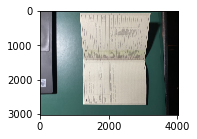

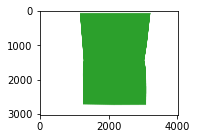

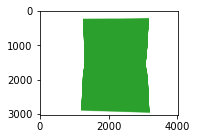

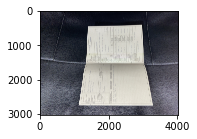

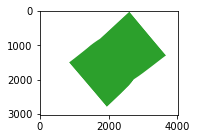

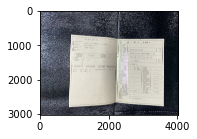

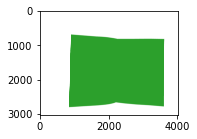

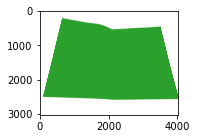

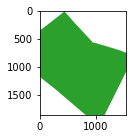

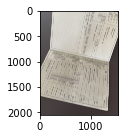

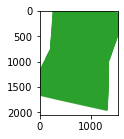

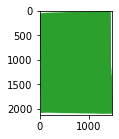

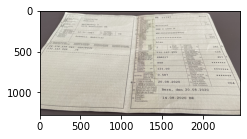

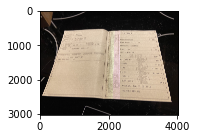

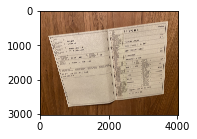

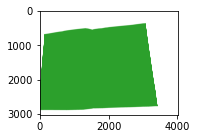

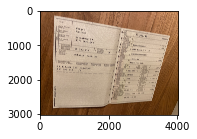

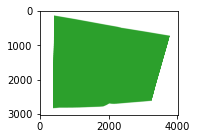

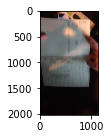

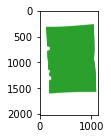

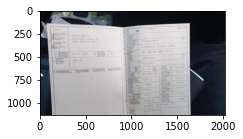

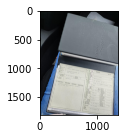

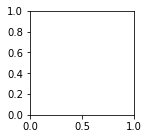

In [10]:
plt.figure(figsize=(10,10))
columns = 2
for i, image in enumerate(images):
    print(i)
    fig = plt.figure()
    fig.set_size_inches(80,80)
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.imshow(image)

In [ ]:
plt.figure(figsize=(10,10))
columns = 2
for i, image in enumerate(images):
    fig = plt.figure()
    fig.set_size_inches(100,100)
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.imshow(image)

In [6]:
json_object = json.dumps(jason, indent = 4) 
print(json_object)

{
    "source-ref": "s3://danzim/10243.jpg",
    "Fahrzeugausweis-ref": "s3://danzim/ba-semseg/annotations/consolidated-annotation/output/0_2022-05-11T13:31:29.272014.png",
    "Fahrzeugausweis-ref-metadata": {
        "internal-color-map": {
            "0": {
                "class-name": "BACKGROUND",
                "hex-color": "#ffffff",
                "confidence": 0
            },
            "1": {
                "class-name": "Fahrzeugausweis",
                "hex-color": "#2ca02c",
                "confidence": 0
            }
        },
        "type": "groundtruth/semantic-segmentation",
        "human-annotated": "yes",
        "creation-date": "2022-05-11T13:31:29.469860",
        "job-name": "labeling-job/ba-semseg"
    }
}


In [22]:
import cv2

last_image_path = ""

for index, path in enumerate(cleanedPathList):
    print(index)
    if index % 2 != 0:
        im = cv2.imread(last_image_path)
        im2 = cv2.imread(path)
        
        try:
            if (im.shape != im2.shape):
                print(str(last_image_path) + ": " + str(im.shape))
                print(str(path) + ": " + str(im2.shape))
        except:
            print("no good: " + str(path))
            print("no good: " + str(last_image_path))
                
    last_image_path = path 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77


In [13]:
im = cv2.imread("FZ-PNG/MicrosoftTeams-image (1).png")
print(im.shape)

AttributeError: 'NoneType' object has no attribute 'shape'

In [10]:
def compare(a, b):
    #print("a: " + str(a))
    im_png = cv2.imread(a)
    print(im_png.shape)
    #print("b: " + str(b))
    im_mask = cv2.imread(b)
    print(im_mask.shape)

for i in range(len(cleanedPathList)):
    for j in range(i + 1, len(cleanedPathList)):
        compare(cleanedPathList[i], cleanedPathList[j])

(3024, 4032, 3)
(3024, 4032, 3)
(3024, 4032, 3)
(900, 1600, 3)
(3024, 4032, 3)
(900, 1600, 3)
(3024, 4032, 3)
(589, 671, 3)
(3024, 4032, 3)
(589, 671, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)
(3024, 4032, 3)
(3000, 4000, 3)


KeyboardInterrupt: 